<a href="https://colab.research.google.com/github/SergeyB81/Portfolio-DS/blob/main/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5%20CG/Bank-62-68/bank_ds_trainee_test_case_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Задание №4**. Предположим, что мы построили рекомендательную систему, и ожидаем, что средний чек клиента вследствие этого должен вырасти. Мы провели AB-тест и собрали данные по контрольной и тестовой группе. Предложите и проведите статистический тест, который можно применить к этим данным.

В процессе выполнения задания разрешено пользоваться библиотеками scipy и statsmodels.

In [52]:
import pandas as pd
import numpy as np

In [53]:
control = np.random.lognormal(mean=5, sigma=2, size=(100000,))
test = np.random.lognormal(mean=5.04, sigma=2, size=(100000,))

In [54]:
control

array([   380.73903066,    344.99071324,   2517.84969877, ...,
         1121.99439143, 101098.82938912,    117.45014184])

In [55]:
pd.Series(control)

,0
0,380.739031
1,344.990713
2,2517.849699
3,4816.438072
4,2027.862349
...,...
99995,864.970001
99996,36.808037
99997,1121.994391
99998,101098.829389


<Axes: >

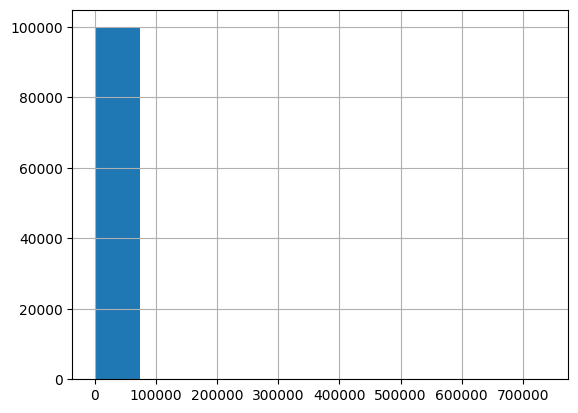

In [56]:
pd.Series(control).hist()

<Axes: >

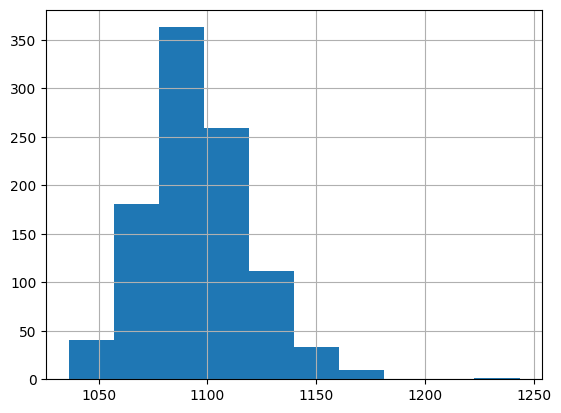

In [57]:
pd.Series([np.random.lognormal(mean=5, sigma=2, size=100000).mean() for _ in range(1000)]).hist()

In [58]:
np.mean([np.random.lognormal(mean=5, sigma=2, size=100000).mean() for _ in range(1000)])

np.float64(1096.5306036247587)

In [59]:
np.mean([np.random.lognormal(mean=5.04, sigma=2, size=100000).mean() for _ in range(1000)])

np.float64(1140.7838534483515)

In [60]:
from scipy.stats import ttest_ind

In [61]:
ttest_ind(control, test, equal_var=False)

TtestResult(statistic=np.float64(-1.640221972536891), pvalue=np.float64(0.10096064794490399), df=np.float64(193478.63479532884))

In [62]:
from tqdm.notebook import tqdm

In [63]:
n = 1000
result = []
for _ in tqdm(range(n)):
  control = np.random.lognormal(mean=5, sigma=2, size=(100000,))
  test = np.random.lognormal(mean=5.04, sigma=2, size=(100000,))
  _, pval = ttest_ind(control, test, equal_var=False)
  result.append(pval)


  0%|          | 0/1000 [00:00<?, ?it/s]

In [64]:
t = pd.Series(result)

<Axes: >

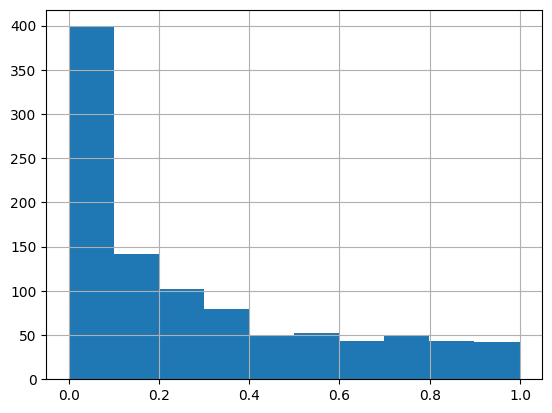

In [65]:
t.hist()

In [66]:
(t < 0.05).mean()

np.float64(0.267)

**то есть t тест дедектит только 30%, когда средние действительно разные. Так как взяты из разных распределений. Это говорит о том что данные распределены ненормально и мы не можем его использовать.**


In [67]:
import seaborn as sns

<Axes: ylabel='Proportion'>

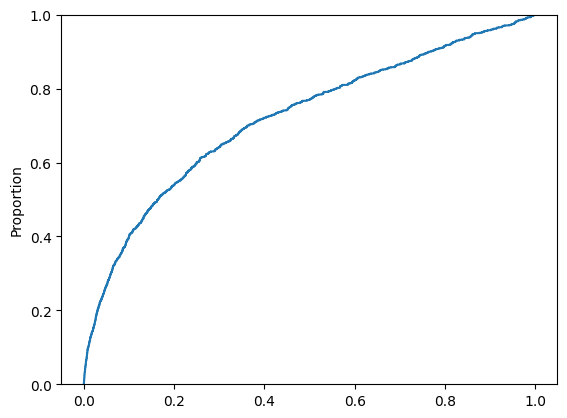

In [68]:
sns.ecdfplot(t)

In [69]:
n = 1000
result = []
for _ in tqdm(range(n)):
  control = np.random.pareto(0.5, size=10000)
  test = np.random.pareto(0.5, size=10000)
  _, pval = ttest_ind(control,test,equal_var=False)
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

<Axes: >

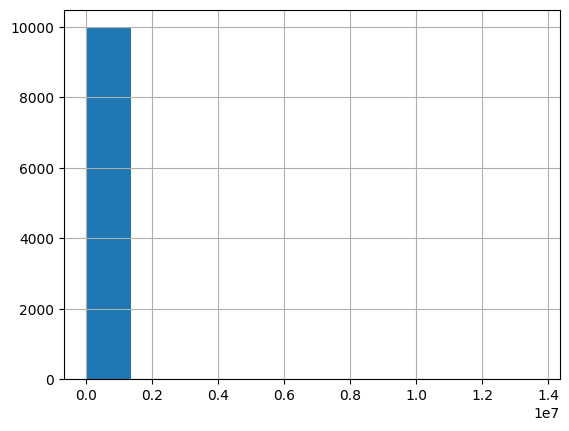

In [70]:
pd.Series(control).hist()

In [71]:
t = pd.Series(result)

<Axes: >

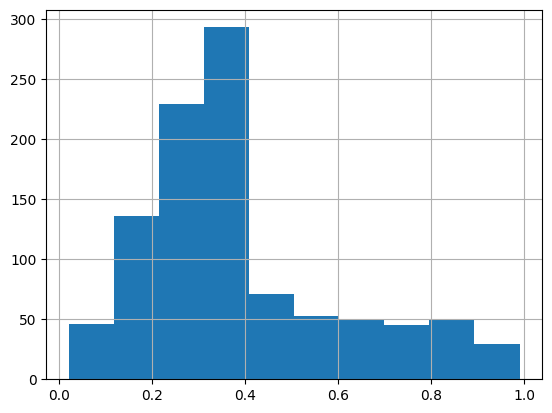

In [72]:
t.hist()

<Axes: ylabel='Proportion'>

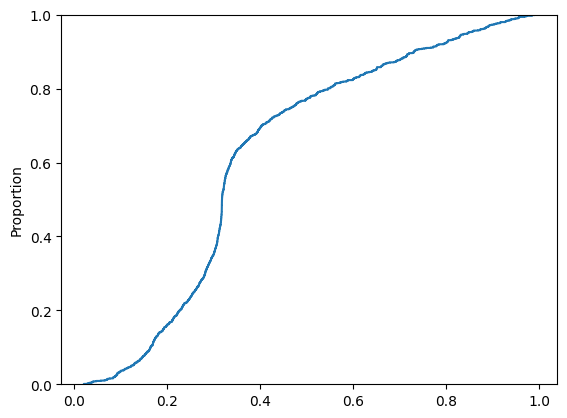

In [73]:
sns.ecdfplot(t)

In [74]:
(t < 0.05).mean()

np.float64(0.009)

## **Манн-Уитни**

In [75]:
from scipy.stats import mannwhitneyu

In [76]:
mannwhitneyu(control,test)

MannwhitneyuResult(statistic=np.float64(50312656.0), pvalue=np.float64(0.4437790710770565))

In [77]:
n = 1000
result = []
for _ in tqdm(range(n)):
  control = np.random.lognormal(mean=5, sigma=2, size=100000)
  test = np.random.lognormal(mean=5.04, sigma=2, size=100000)
  _, pval = mannwhitneyu(control,test)
  result.append(pval)

t = pd.Series(result)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [78]:
(t < 0.05).mean()

np.float64(0.994)

In [79]:
n = 100
result = []
for _ in tqdm(range(n)):
  control = np.random.lognormal(mean=5, sigma=2, size=100000)
  test = np.random.lognormal(mean=5.04, sigma=2, size=100000)
  _, pval = mannwhitneyu(control,test)
  result.append(pval)

t = pd.Series(result)

  0%|          | 0/100 [00:00<?, ?it/s]

In [80]:
(t < 0.05).mean()

np.float64(1.0)

## **Понижение дисперсии**

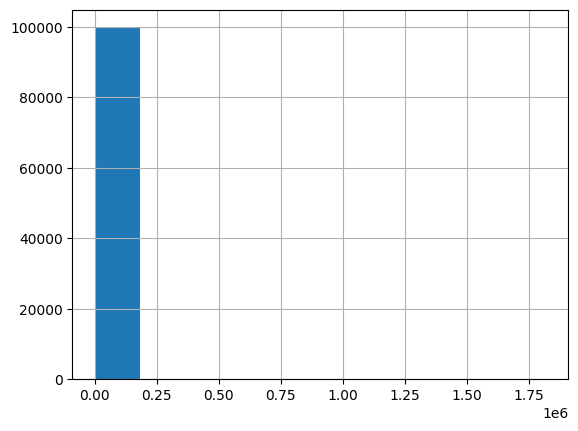

In [81]:
pd.Series(control).hist();

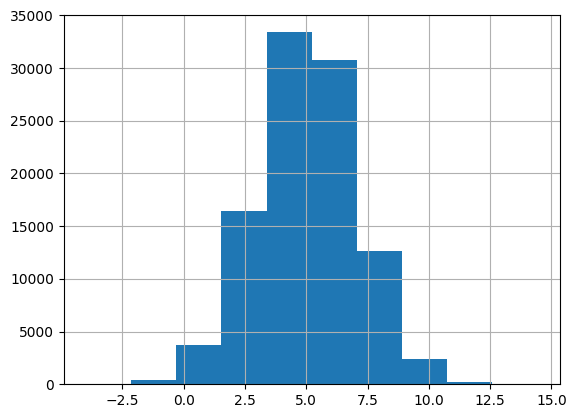

In [82]:
pd.Series(np.log(control)).hist();

In [83]:
n = 1000
result = []
for _ in tqdm(range(n)):
  control = np.log(np.random.lognormal(mean=5, sigma=2, size=100000))
  test = np.log(np.random.lognormal(mean=5.04, sigma=2, size=100000))
  _, pval = ttest_ind(control,test,equal_var=False)
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [84]:
t = pd.Series(result)

In [85]:
(t < 0.5).mean()

np.float64(1.0)

## **Бутстрап (Монте-Карло)**

In [117]:
control = np.random.lognormal(mean=5, sigma=2, size=(100000,))
test = np.random.lognormal(mean=5.04, sigma=2, size=(100000,))

In [118]:
len(np.concatenate((control,test)))

200000

In [119]:
merged = pd.Series(np.concatenate((control,test)))

In [120]:
control.mean()

np.float64(1086.4627228198767)

In [121]:
test.mean()

np.float64(1148.712655222836)

In [122]:
base_diff = abs(control.mean() - test.mean())

In [123]:
base_diff

np.float64(62.2499324029593)

In [124]:
def bootstrap(control,test):
  n = 100
  result = []
  base_diff = np.abs(control.mean() - test.mean())
  merged = pd.Series(np.concatenate((control,test)))

  for _ in range(n):
    control = merged.sample(100000,replace=True)
    test = merged.sample(100000,replace=True)

    diff = np.abs(control.mean() - test.mean())

    result.append(diff >= base_diff)

  return pd.Series(result).mean()

In [125]:
n = 100
result = []
for _ in tqdm(range(n)):
  control = np.random.lognormal(mean=5, sigma=2, size=1000)
  test = np.random.lognormal(mean=5.04, sigma=2, size=1000)

  pval = bootstrap(control,test)

  result.append(pval)

  0%|          | 0/100 [00:00<?, ?it/s]

In [126]:
t = pd.Series(result)

<Axes: >

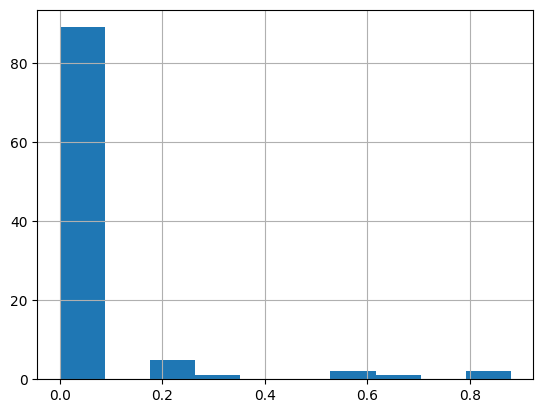

In [127]:
t.hist()

In [128]:
(t < 0.05).mean()

np.float64(0.87)

### **Задание №4 (*)**. В прошлом задании мы улавливали статистически значимое различие в средних в 0.04 единицы на выборке из 100000 клиентов. Насколько больше нам требуется собрать клиентов, чтобы уловить различие в 0.02?

In [130]:
n = 100
result = []
for _ in tqdm(range(n)):
  control = np.random.lognormal(mean=5, sigma=2, size=100000)
  test = np.random.lognormal(mean=5.02, sigma=2, size=100000)
  _, pval = mannwhitneyu(control,test)
  result.append(pval)

t = pd.Series(result)
(t < 0.05).mean()

  0%|          | 0/100 [00:00<?, ?it/s]

np.float64(0.61)

<Axes: >

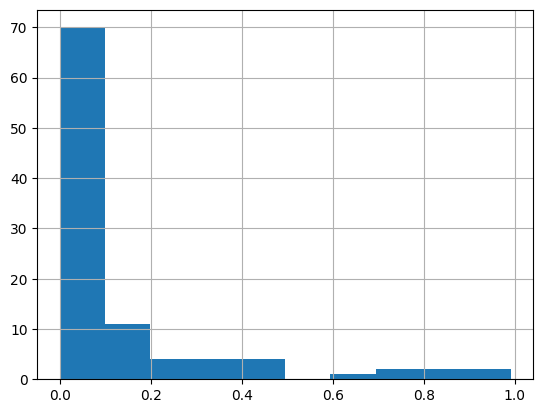

In [131]:
t.hist()

In [132]:
(t < 0.05).mean()

np.float64(0.61)

In [133]:
n = 100
result = []
for _ in tqdm(range(n)):
  control = np.random.lognormal(mean=5, sigma=2, size=160000)
  test = np.random.lognormal(mean=5.02, sigma=2, size=160000)
  _, pval = mannwhitneyu(control,test)
  result.append(pval)

t = pd.Series(result)
(t < 0.05).mean()

  0%|          | 0/100 [00:00<?, ?it/s]

np.float64(0.77)

In [134]:
n = 1000
result = []
for _ in tqdm(range(n)):
  control = np.random.lognormal(mean=5, sigma=2, size=165000)
  test = np.random.lognormal(mean=5.02, sigma=2, size=165000)
  _, pval = mannwhitneyu(control,test)
  result.append(pval)

t = pd.Series(result)
(t < 0.05).mean()

  0%|          | 0/1000 [00:00<?, ?it/s]

np.float64(0.805)